---

# YZV 311E Data Mining
## Homework 1 

### Res. Asst. Yaren Yılmaz
---

Before starting, please read the instructions in the pdf file carefully. Do not delete or change any code line in the notebook.
In this homework you will analyze the 'World University Ranking Data'. Read README.txt file from the drive link to understand your dataset.

In [1]:
import pandas as pd
import numpy as np

# For visualization. You are free to use one of them
import matplotlib.pyplot as plt
import seaborn as sns

# Do not import any other libraries

### Fill
* Student ID:150230723
* Student Name:Furkan Yasir Göksu

## PART 1: Data Understanding 17p
* Use the link to download the dataset.
https://drive.google.com/drive/folders/1YUyrp1nGv9kdQPJFPjvGUuf_E7kiMbXt?usp=share_link

In [2]:
# Read CSV File
path =  "university_rankings.csv" # Give your own path
df = pd.read_csv(path, index_col=0)

In [3]:
df.head()

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,scores_international_outlook,scores_international_outlook_rank,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered
0,1,University of Oxford,98.5,10.0,96.6,5,100.0,2,99.0,5,...,97.5,14,master_account,0,United Kingdom,"21,750",10.9,42%,49 : 51,"Geography,Chemistry,Chemical Engineering,Biolo..."
1,2,Stanford University,98.0,20.0,99.0,1,97.8,8,99.6,2,...,87.0,167,private,0,United States,"14,517",6.4,23%,47 : 53,"Computer Science,Communication & Media Studies..."
2,3,Massachusetts Institute of Technology,97.9,30.0,98.6,2,96.2,11,99.7,1,...,93.8,66,private,0,United States,"11,085",8.0,33%,41 : 59,"Architecture,Economics & Econometrics,Archaeol..."
3,4,Harvard University,97.8,40.0,97.7,3,99.9,3,99.4,3,...,90.8,119,private,0,United States,"20,050",9.0,25%,51 : 49,"Sociology,Architecture,Physics & Astronomy,Psy..."
4,5,University of Cambridge,97.5,50.0,95.8,7,100.0,1,98.0,12,...,97.4,15,master_account,0,United Kingdom,"20,565",11.5,38%,48 : 52,Politics & International Studies (incl Develop...


In [4]:
df.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'location', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'subjects_offered'],
      dtype='object')

In [5]:
rows = df.shape[0]  
features = df.shape[1]  
print("# of Features: %d, # of Rows: %d" % (features, rows))

# of Features: 22, # of Rows: 1904


### 1.2 Create your own function describe() function 7p
**Create a function called display_statistical_info(). It should take your dataframe as parameter and returns a new dataframe that includes the following features.** Assign **nan** for statistical values of columns with object dtype. <br>

* **Name**: name of the feature(column)<br>
* **Fill_Value**: number of rows non-missing rows<br>
* **#_Missing_Value** : how many missing value exist <br>
* **\%_Missing_Value**: percentage representation of missing values<br>
* **Data_Type**: data type of the feature<br>
* **#_Unique_Values**: how many unique values exist<br>
* **Unique_Values**: shows all the unique values as a list<br>

Below statistical information can be listed only for numerical features. You are expected to write your own mean, std functions. Do not use built-in mean, std functions.

* **Mean**: mean of values<br>
* **STD**: standard deviation<br>
* **Min**: minimum value<br>
* **Q1**: %25 of features<br>
* **Q2**: %25 of features<br>
* **Q3**: %75 of features<br>
* **Max**: minimum value<br>

In [6]:
df = pd.read_csv(path,index_col=0)

def display_statistical_info(df):
    # Calculate the mean of numeric values
    def calculateMean(data):
        total = 0
        count = 0
        for cell in data:
            try:
                cell = float(cell)
                total += cell
                count += 1
            except:
                continue
        return total / count if count > 0 else np.nan

    # Calculate the standard deviation of numeric values
    def calculateStd(data, mean):
        diff = 0
        count = 0
        for cell in data:
            try:
                cell = float(cell)
                diff += (cell - mean) ** 2
                count += 1
            except:
                continue
        if count < 2:
            return np.nan
        variance = diff / (count - 1)
        std = variance ** 0.5
        return std

    # Calculate the minimum of numeric values
    def calculateMin(data):
        min = data[0]
        for cell in data:
            try:
                cell = float(cell)
                if np.isnan(min) or cell < min:
                    min = cell
            except:
                continue
        return min

    # Calculate the maximum of numeric values
    def calculateMax(data):
        max = data[0]
        for cell in data:
            try:
                cell = float(cell)
                if np.isnan(max) or cell > max:
                    max = cell
            except:
                continue
        return max

    # Calculate the first quartile (Q1) of numeric values
    def calculateQ1(data):
        numbers = []
        for cell in data:
            try:
                cell = float(cell)
                numbers.append(cell)
            except:
                continue
        if len(numbers) == 0:
            return np.nan
        result = sorted(numbers)
        index = int(0.25 * len(result))
        return result[index]

    # Calculate the second quartile (Q2 or median) of numeric values
    def calculateQ2(data):
        numbers = []
        for cell in data:
            try:
                cell = float(cell)
                numbers.append(cell)
            except:
                continue
        if len(numbers) == 0:
            return np.nan
        result = sorted(numbers)
        index = int(0.5 * len(result))
        return result[index]

    # Calculate the third quartile (Q3) of numeric values
    def calculateQ3(data):
        numbers = []
        for cell in data:
            try:
                cell = float(cell)
                numbers.append(cell)
            except:
                continue
        if len(numbers) == 0:
            return np.nan
        result = sorted(numbers)
        index = int(0.75 * len(numbers))
        return result[index]

    # Create a dictionary containing the column information
    column_info = {
        "Name": df.columns.tolist(),
        "Fill_Value": df.count(),
        "Number_Missing_Value": df.isnull().sum(),
        "%_Missing_Value": (df.isnull().sum() / df.shape[0]) * 100,
        "Data_Type": df.dtypes,
        "Number_Unique_Values": df.nunique(),
        "Unique_Values": [df[column].unique().tolist() for column in df.columns],
        "Mean": [calculateMean(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "STD": [calculateStd(df[column], calculateMean(df[column])) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "Min": [calculateMin(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "Q1": [calculateQ1(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "Q2": [calculateQ2(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "Q3": [calculateQ3(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
        "Max": [calculateMax(df[column]) if df[column].dtype != 'object' else np.nan for column in df.columns],
    }

    # Create a DataFrame from the column_info dictionary
    dfInfo = pd.DataFrame(column_info)
    dfInfo.reset_index(drop=True, inplace=True)

    return dfInfo



In [7]:
df_info = display_statistical_info(df)

In [8]:
df_info

,Name,Fill_Value,Number_Missing_Value,%_Missing_Value,Data_Type,Number_Unique_Values,Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
0,rank,1904,0,0.000000,object,159,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,name,1904,0,0.000000,object,1904,"[University of Oxford, Stanford University, Ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,scores_overall,1904,0,0.000000,object,159,"[98.5, 98.0, 97.9, 97.8, 97.5, 96.9, 96.5, 95....",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,scores_overall_rank,1884,20,1.050420,float64,1884,"[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....",NaN,NaN,10.0,4770.0,9530.0,14290.0,19040.0
4,scores_teaching,1892,12,0.630252,float64,472,"[96.6, 99.0, 98.6, 97.7, 95.8, 96.3, 90.9, 87....",NaN,NaN,9.4,50.1,18.6,24.4,99.0
5,scores_teaching_rank,1904,0,0.000000,int64,1904,"[5, 1, 2, 3, 7, 6, 4, 12, 18, 10, 16, 9, 13, 8...",952.500000,549.781775,1.0,477.0,953.0,1429.0,1904.0
6,scores_research,1904,0,0.000000,float64,506,"[100.0, 97.8, 96.2, 99.9, 97.9, 98.0, 95.5, 98...",23.416176,16.697923,4.6,11.8,17.3,29.9,100.0
7,scores_research_rank,1904,0,0.000000,int64,1904,"[2, 8, 11, 3, 1, 7, 6, 12, 4, 13, 10, 5, 19, 9...",952.500000,549.781775,1.0,477.0,953.0,1429.0,1904.0
8,scores_citations,1904,0,0.000000,float64,809,"[99.0, 99.6, 99.7, 99.4, 98.0, 98.8, 95.9, 98....",52.189706,25.071342,3.4,30.4,52.4,73.3,99.7
9,scores_citations_rank,1904,0,0.000000,int64,1904,"[5, 2, 1, 3, 12, 7, 38, 8, 4, 18, 41, 73, 20, ...",952.500000,549.781775,1.0,477.0,953.0,1429.0,1904.0


### 1.3 Correlation 10p
#### Write your own correlation matrix
* In this part, you have to write your own correlation function.  You can use df.corr() **only** to compare your result. Implement the given pearson correlation formula to feature pairs. You are only allowed to use built-in mean, sum, sqrt methods. <br>
* Calculate correlation between each pair of features and fill the matrix
* Create dataframe using the matrix for better visualization with column names and indexes are the names of numeric columns
<br>
* You can use $round(correlation\_value, 6)$ for more understandable results after calculating the correlation value


In [9]:
df = pd.read_csv(path,index_col=0)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  # numeric feature dtypes

def calculate_correlation_matrix(df):
    object_columns = df.select_dtypes(include='object').columns
    # Set the values in these columns to NaN
    df[object_columns] = np.nan
    def calculate_correlation(col1, col2):
        mean1 = col1.mean()
        mean2 = col2.mean()
        
        # Calculate the numerator of the Pearson correlation formula
        x = ((col1 - mean1) * (col2 - mean2)).sum()
        
        # Calculate the correlation using the Pearson formula
        correlation = x / (np.sqrt(((col1 - mean1) ** 2).sum()) * np.sqrt(((col2 - mean2) ** 2).sum()))

        # Round the correlation value to 6 decimal places for readability
        return round(correlation, 6)

    Columns = df.columns
    # Create an empty DataFrame to store the correlation matrix, with column and index names
    correlationMatrix = pd.DataFrame(columns=Columns, index=Columns)
    
    # Calculate the correlation between all pairs of columns and populate the correlation matrix
    for col1 in Columns:
        for col2 in Columns:
            correlation = calculate_correlation(df[col1], df[col2])
            # Store the correlation value in the corresponding cell of the matrix
            correlationMatrix.at[col1, col2] = correlation

    # Return the completed correlation matrix
    return correlationMatrix

# Example usage with your DataFrame 'df'
correlationMatrix = calculate_correlation_matrix(df)

# Print the resulting correlation matrix
print("Correlation Matrix : ")
print(correlationMatrix)


C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_20744\1967446560.py:17: RuntimeWarning: invalid value encountered in scalar divide
  correlation = x / (np.sqrt(((col1 - mean1) ** 2).sum()) * np.sqrt(((col2 - mean2) ** 2).sum()))


Correlation Matrix : 
                                  rank name scores_overall  \
rank                               NaN  NaN            NaN   
name                               NaN  NaN            NaN   
scores_overall                     NaN  NaN            NaN   
scores_overall_rank                NaN  NaN            NaN   
scores_teaching                    NaN  NaN            NaN   
scores_teaching_rank               NaN  NaN            NaN   
scores_research                    NaN  NaN            NaN   
scores_research_rank               NaN  NaN            NaN   
scores_citations                   NaN  NaN            NaN   
scores_citations_rank              NaN  NaN            NaN   
scores_industry_income             NaN  NaN            NaN   
scores_industry_income_rank        NaN  NaN            NaN   
scores_international_outlook       NaN  NaN            NaN   
scores_international_outlook_rank  NaN  NaN            NaN   
record_type                        NaN  NaN     

#### Plot heatmap using this matrix

* Plot a heatmap using the correlation matrix you calculated.

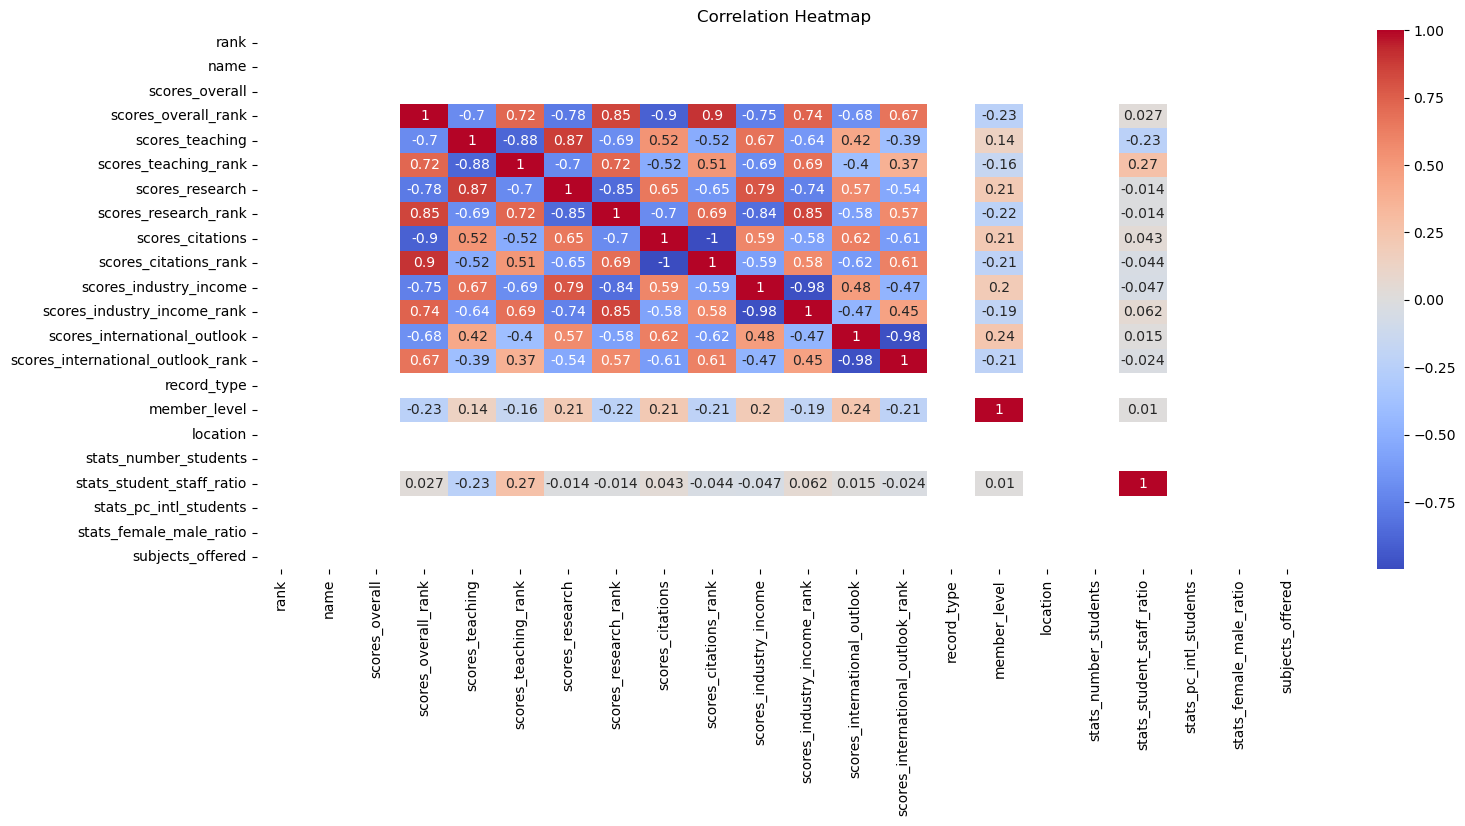

In [10]:
correlationMatrix = correlationMatrix.astype(float)
# Create a heatmap for the correlationMatrix
plt.figure(figsize=(17, 7))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Write down your interpretations about the correlation results.
* Compare your results with df.corr() result.
* Analyze and comment on correlation result on heatmap.


In [11]:
print("Absolute error sum :", (df.corr()).sum().sum())

Absolute error sum : 4.002640942918433


#### Are there any highly correlated (>0.8) features ? What does it mean for these highly correlated attributes ? Explain.

A correlation greater than 0.8 indicates a strong, positive relationship between two variables. This means that as the value of one variable increases, the value of the other variable usually increases. However, correlation does not determine cause-effect relationships, it only measures the relationship between two variables.

## PART 2: Handling Missing Values 25p
* Before doing analyses on the dataset, we should handle some problems such as missing values. You should handle the missing values of the columns as you found in the Part 1.2: ["scores_overall_rank", "scores_teaching","stats_female_male_ratio"].
* You should implement different techniques for different colummns. If there are some problems you need to solve before, you can use your own approach (but do not drop the problematic rows)

### Handling missing "scores_teaching" values 
* There is a strong relationship between the columns scores_teaching and scores_research. (Check the correlation matrix) You can use this relationship to fill out the missing values in the "scores_teaching" column.
* Fill out the missing values by using the mean of the "scores_teaching" feature of the rows where "scores_research" is equal to plus 5 or minus 5 of the row which has the missing value.

In [12]:
df = pd.read_csv(path,index_col=0)

# Count the number of missing values in each column and store it in the "Problems" variable
Problems = df.isnull().sum()

# Calculate the mean of the "scores_teaching" column and assign the mean value to the "meanofTeaching" variable
meanofTeaching = df["scores_teaching"].mean()

# Define a function 'fill' to handle missing values in the "scores_teaching" column
def fill(df, mean):
    # Navigate through the "scores_teaching" column in the DataFrame and examine each cell
    for index, cell in df["scores_teaching"].items():
        if pd.isna(cell):
            # If there is a missing value (NaN) in the cell, do the following:
            # Take the value from the "scores_research" column in the relevant row and assign it to the variable named "research"
            research = df["scores_research"].iloc[index]
            if (research == int(mean) + 5) or (research == int(mean) - 5):
                # If the "research" value is equal to 5 more or 5 less than the "mean" variable, do the following:
                df.loc[index, "scores_teaching"] = mean
                # Fill the relevant cell with the "mean" value
            else:
                continue
        else:
            continue

# Call the 'fill' function to fill missing values in the "scores_teaching" column based on the defined condition
fill(df, meanofTeaching)

print(df)


       rank                                   name scores_overall  \
0         1                   University of Oxford           98.5   
1         2                    Stanford University           98.0   
2         3  Massachusetts Institute of Technology           97.9   
3         4                     Harvard University           97.8   
4         5                University of Cambridge           97.5   
...     ...                                    ...            ...   
1899  1501+                     Yanshan University       9.7-22.7   
1900  1501+                    Yeditepe University       9.7-22.7   
1901  1501+               Yerevan State University       9.7-22.7   
1902  1501+            Yogyakarta State University       9.7-22.7   
1903  1501+     Zonguldak Bülent Ecevit University       9.7-22.7   

      scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                    10.0             96.6                     5   
1                    20.0          

### Handling missing "scores_overall_rank" values 
* Assume that two universities have similar rankings, then we expect that their overall rank should be closer. By using this assumption, you should fill out the missing values from the "scores_overall_rank" feature by using K-Neares Neighbor.
* You can find the closest 3 neighbors by using columns ['scores_teaching_rank', 'scores_research_rank', 'scores_citations_rank',
'scores_industry_income_rank', 'scores_international_outlook_rank'] and use their mean to fill the missing values.
* Find the K Nearest Neighbors from scratch. Do not use any libraries. Use Minkowski distance as the similarity measure where r=1.

In [13]:
# Run the cell to check your implementation
tolerance = 1e-6
print(np.abs(df[df.index == 48]["scores_overall_rank"] - 490) < tolerance)
print(np.abs(df[df.index == 68]["scores_overall_rank"] - 690) < tolerance)
print(np.abs(df[df.index == 176]["scores_overall_rank"] - 1770) < tolerance)

48    True
Name: scores_overall_rank, dtype: bool
68    True
Name: scores_overall_rank, dtype: bool
176    True
Name: scores_overall_rank, dtype: bool


### Handling missing "stats_female_male_ratio" values 
* Fill the missing values by using the mean values of female values.
* You should remember that the sum of the female-male should be equal to 100.

In [14]:
df = pd.read_csv(path, index_col=0)

# Create an empty list 'femaleList' to store female data
femaleList = []

# Iterate through the "stats_female_male_ratio" column in the DataFrame
for index, cell in df["stats_female_male_ratio"].items():
    # If there is not a missing value (NaN) in the cell, do the following:
    if not pd.isna(cell):
        # Separating the data in the cell using the split method and converting it into two separate values: female and male
        female, male = cell.split(" : ")
        # Collect female data in the 'femaleList' list
        female = int(female)
        femaleList.append(female)
    else:
        continue

# Calculate the mean of the 'femaleList'
meanofFemale = np.mean(femaleList)
print(meanofFemale)

# Create a value to fill NaN values using the calculated average
def fill(df, mean):
    # Calculate the missing male percentage as 100 - meanofFemale
    temp = 100 - meanofFemale
    Value = f"{mean} : {temp}"
    # Iterate through the "stats_female_male_ratio" column in the DataFrame
    for index, cell in df["stats_female_male_ratio"].items():
        if pd.isna(cell):
            # If there is a missing value (NaN) in the cell, do the following:
            # Substitute the desired value into the NaN value
            df.at[index, "stats_female_male_ratio"] = Value
        else:
            continue

# Call the 'fill' function to fill missing values in the "stats_female_male_ratio" column with the calculated average
fill(df, meanofFemale)

print(df)

51.16748768472906
       rank                                   name scores_overall  \
0         1                   University of Oxford           98.5   
1         2                    Stanford University           98.0   
2         3  Massachusetts Institute of Technology           97.9   
3         4                     Harvard University           97.8   
4         5                University of Cambridge           97.5   
...     ...                                    ...            ...   
1899  1501+                     Yanshan University       9.7-22.7   
1900  1501+                    Yeditepe University       9.7-22.7   
1901  1501+               Yerevan State University       9.7-22.7   
1902  1501+            Yogyakarta State University       9.7-22.7   
1903  1501+     Zonguldak Bülent Ecevit University       9.7-22.7   

      scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                    10.0             96.6                     5   
1                

In [15]:
# Run the cell and check that you dont have any missing values. The values should be zero
df.isna().sum()

rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                  20
scores_teaching                      12
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
record_type                           0
member_level                          0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio               0
subjects_offered                      0
dtype: int64

## PART 3: Converting Categorical to Numeric Value 15p

### 1. Convert "rank" feature into numeric
* Check the feature "rank". Why it is not a numeric feature ?
* Take mean to convert the necessary rows to numeric using apply function.
* Show the distribution of the rank feature.

Mean is : 73.54464285714286


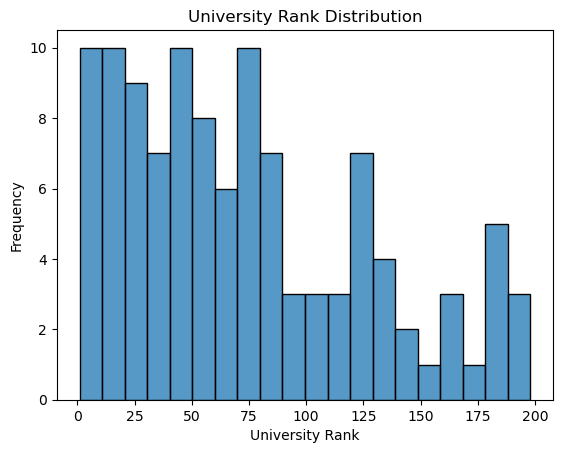

In [16]:
df = pd.read_csv(path,index_col=0)

# Define a function 'rearrange' to convert values to numeric and handle exceptions
def rearrange(cell):
    try:
        return pd.to_numeric(cell)  # Try to convert the cell to a numeric value
    except:
        return np.nan  # If conversion fails, set the value to NaN

# Apply the 'rearrange' function to the "rank" column in the DataFrame 'df'
df["rank"] = df["rank"].apply(rearrange)

# Calculate the mean of the "rank" column and store it in 'mean'
mean = df["rank"].mean()

# Print the mean value
print(f"Mean is : {mean}")

# Create a histogram plot to visualize the distribution of university ranks
sns.histplot(data=df, x=df['rank'], bins=20)
plt.title('University Rank Distribution')
plt.xlabel('University Rank')
plt.ylabel('Frequency')
plt.show()


In [17]:
df["rank"].describe()

count    112.000000
mean      73.544643
std       53.561094
min        1.000000
25%       28.750000
50%       62.500000
75%      114.250000
max      198.000000
Name: rank, dtype: float64

**Print the cleaned numeric rank value of 'Istanbul Technical University', 'University of Oxford', 'Technical University of Munich' and 'International Hellenic University'**

In [18]:
print("Rank of Istanbul Technical University: ", df[df["name"]=="Istanbul Technical University"]["rank"].values)
print("Rank of University of Oxford: ", df[df["name"]=="University of Oxford"]["rank"].values)
print("Rank of Technical University of Munich: ", df[df["name"]=="Technical University of Munich"]["rank"].values)
print("Rank of International Hellenic University: ", df[df["name"]=="International Hellenic University"]["rank"].values)

Rank of Istanbul Technical University:  [nan]
Rank of University of Oxford:  [1.]
Rank of Technical University of Munich:  [nan]
Rank of International Hellenic University:  [nan]


### 2. Convert "stats_pc_intl_students" feature into numeric
* The column "stats_pc_intl_students" shows the percentage of international student using the format '%20'.
* You should convert the values into numeric values such as: "%25" -> 0.25, "%40" -> 0.4 using apply function.

In [19]:
df = pd.read_csv(path,index_col=0)

df = pd.read_csv(path, index_col=0)
# Define a function 'Convert' to convert percentage values to decimal values
def Convert(cell):
    # Split the percentage value and the '%' sign
    newCell,space = cell.split("%")
    # Convert the new value to a floating-point decimal value (divide by 100)
    return int(newCell) / 100

# Apply the 'Convert' function to the "stats_pc_intl_students" column in the DataFrame 'df'
df["stats_pc_intl_students"] = df["stats_pc_intl_students"].apply(Convert)



In [20]:
print(df["stats_pc_intl_students"].unique())

[0.42 0.23 0.33 0.25 0.38 0.61 0.22 0.21 0.43 0.1  0.36 0.14 0.28 0.35
 0.15 0.24 0.27 0.16 0.44 0.18 0.46 0.39 0.64 0.19 0.29 0.47 0.53 0.34
 0.09 0.72 0.2  0.3  0.45 0.08 0.11 0.05 0.51 0.13 0.48 0.17 0.31 0.67
 0.4  0.26 0.37 0.32 0.12 0.06 0.57 0.07 0.04 0.41 0.6  0.01 0.49 0.02
 0.03 0.92 0.55 0.83 0.   0.5  0.54 0.74 0.75 0.86 0.52]


### 3. Convert "stats_number_students" feature into numeric

In [21]:
df = pd.read_csv(path,index_col=0)

# Define a function 'Convert' to convert formatted numbers to numeric values
def Convert(cell):
    try:
        # Split the formatted number by a comma (",")
        firstNumber, secondNumber = cell.split(",")
        # Convert the formatted number to a numeric value by combining the parts
        return int(firstNumber) + (int(secondNumber) / 1000)
    except:
        # If an exception occurs, return the original value as an integer
        return int(cell)

# Apply the 'Convert' function to the "stats_number_students" column in the DataFrame 'df'
df["stats_number_students"] = df["stats_number_students"].apply(Convert)

print(df["stats_number_students"])


0       21.750
1       14.517
2       11.085
3       20.050
4       20.565
         ...  
1899    39.191
1900    17.378
1901    13.838
1902    24.073
1903    29.329
Name: stats_number_students, Length: 1904, dtype: float64


### 4. Convert "scores_overall" feature into numeric
* Take mean to convert the necessary rows to numeric using apply function.
* Show the distribution of the scores_overall feature.

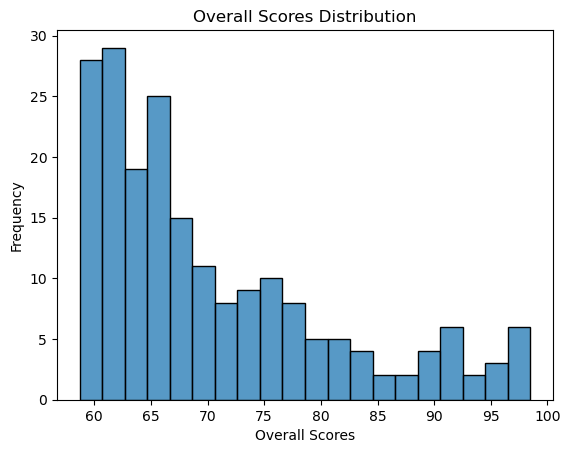

In [22]:
df = pd.read_csv(path,index_col=0)

# Define a function 'rearrange' to convert values to numeric and handle exceptions
def rearrange(cell):
    try:
        return pd.to_numeric(cell)  # Try to convert the cell to a numeric value
    except:
        return np.nan  # If conversion fails, set the value to NaN

# Apply the 'rearrange' function to the "scores_overall" column in the DataFrame 'df'
df["scores_overall"] = df["scores_overall"].apply(rearrange)

# Calculate the mean of the "scores_overall" column and store it in 'mean'
mean = df["scores_overall"].mean()

# Create a histogram plot to visualize the distribution of overall scores
sns.histplot(data=df, x=df['scores_overall'], bins=20)
plt.title('Overall Scores Distribution')
plt.xlabel('Overall Scores')
plt.ylabel('Frequency')
plt.show()


In [23]:
df["scores_overall"].describe()

count    201.000000
mean      70.358706
std       10.598516
min       58.700000
25%       62.000000
50%       66.600000
75%       75.600000
max       98.500000
Name: scores_overall, dtype: float64

In [24]:
df.dtypes

rank                                  object
name                                  object
scores_overall                       float64
scores_overall_rank                  float64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
record_type                           object
member_level                           int64
location                              object
stats_number_students                 object
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_male_ratio               object
subjects_offered                      object
dtype: obj

## PART 4: Data Exploration & Visualization 33p
* In this part, you will use some visualization techniques and statistical analysis to examine the dataset better.
* Do not forget to write your comments.

* **In what percentage of universities do the number of female students exceed the number of male students?**

In [25]:
df = pd.read_csv(path,index_col=0)
# Initialize empty lists to store female and male data
maleList = []
femaleList = []

# Iterate through the "stats_female_male_ratio" column in a DataFrame (df)
for cell in df["stats_female_male_ratio"]:
    # Check if the cell is empty (NaN), and skip it if it is
    if pd.isna(cell):
        continue
    else:
        # Split the cell value using " : " as the delimiter to extract female and male counts
        female, male = cell.split(" : ")
        
        # Convert and append the extracted counts as integers to their respective lists
        femaleList.append(int(female))
        maleList.append(int(male))

# Calculate the female-to-male ratio percentage difference
# by subtracting the sum of male counts from the sum of female counts, dividing by the sum of male counts, and multiplying by 100
RatioEx = (sum(femaleList) - sum(maleList)) / sum(maleList) * 100
print(RatioEx)

4.781599919297892


* **Plot density plot of female ratio and male ratio seperately in one plot. Interpret the plot**

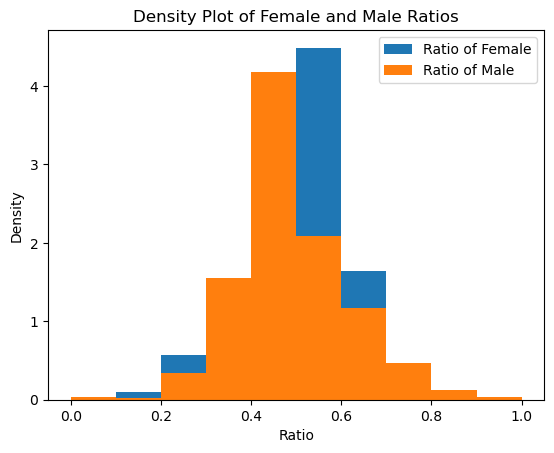

In [26]:
# Convert the female and male ratio lists to NumPy arrays and scale them by 100 to represent percentages
femaleRatio = np.array(femaleList) / 100
maleRatio = np.array(maleList) / 100

# Create a density plot for female ratios using a histogram with density set to True
plt.hist(femaleRatio, density=True, label='Ratio of Female')

# Create a density plot for male ratios using a histogram with density set to True
plt.hist(maleRatio, density=True, label='Ratio of Male')

# Set the X and Y axis labels and the plot title
plt.xlabel('Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Female and Male Ratios')

# Add a legend to distinguish between the two plots
plt.legend()

# Display the plot
plt.show()


* **Find the top 10 universities by rank**

In [27]:
df = pd.read_csv(path,index_col=0)

# Convert the "rank" column in the DataFrame 'df' to numeric, coercing any errors to NaN
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")
# Drop rows with missing values in the "rank" column
df = df.dropna(subset="rank")

# Sort the DataFrame 'df' based on the "rank" column in ascending order
# This will order the DataFrame by the "rank" column from lowest to highest
df = df.sort_values(by="rank", ascending=True)

# Print the names of the top 10 rows (assuming "name" is a column in the DataFrame)
# These are the top 10 entries with the lowest "rank" values
print(df["name"].head(10))

# Print the entire top 10 rows of the sorted DataFrame
# This provides detailed information for the top 10 entries based on their "rank"
print(df.head(10))

0                     University of Oxford
1                      Stanford University
2    Massachusetts Institute of Technology
3                       Harvard University
4                  University of Cambridge
5                     Princeton University
6       California Institute of Technology
7                  Imperial College London
8       University of California, Berkeley
9                          Yale University
Name: name, dtype: object
   rank                                   name scores_overall  \
0   1.0                   University of Oxford           98.5   
1   2.0                    Stanford University           98.0   
2   3.0  Massachusetts Institute of Technology           97.9   
3   4.0                     Harvard University           97.8   
4   5.0                University of Cambridge           97.5   
5   6.0                   Princeton University           96.9   
6   7.0     California Institute of Technology           96.5   
7   8.0                I

* **Which 5 countries have the highest number of universities?**

In [28]:
df = pd.read_csv(path,index_col=0)

# Group the DataFrame 'df' by the values in the "location" column and count the occurrences of each location
result = df.groupby("location").size()

# Sort the resulting counts in descending order, so locations with the highest counts come first
result = result.sort_values(ascending=False)

# Create a new DataFrame 'Top5' containing the top 5 locations with the highest counts
Top5 = pd.DataFrame(result).head(5)

# Iterate through the index of the 'Top5' DataFrame and print the top 5 locations
for i in Top5.index:
    print(i)

United States
Japan
United Kingdom
India
China


* **How many different courses are offered in total by universities? Show the names of these courses in alphabetical order.**

In [29]:
df = pd.read_csv(path,index_col=0)


# Initialize empty lists to store course counts and course names
countList = []
courseName = []

# Iterate through the "subjects_offered" column in the DataFrame 'df'
for course in df["subjects_offered"]:
    # Split the course string by commas to separate individual courses
    allcourses = course.split(",")
    
    # Create a sorted list of course names (sorted alphabetically)
    Name = sorted(allcourses)
    
    # Append the sorted course names to the 'courseName' list
    courseName.append(Name)
    
    # Append the count of courses to the 'countList' based on the length of 'allcourses'
    countList.append(len(allcourses))

# Create an empty DataFrame 'result' to store the results
result = pd.DataFrame()

# Add columns to 'result' with the course counts, university names, and sorted course names
result["Course Count"] = countList
result["University Name"] = df["name"]
result["Subjects Alphabetical"] = courseName

# Print the resulting DataFrame, which contains information about course counts, university names, and sorted course names
print(result)

      Course Count                        University Name  \
0               32                   University of Oxford   
1               33                    Stanford University   
2               28  Massachusetts Institute of Technology   
3               34                     Harvard University   
4               33                University of Cambridge   
...            ...                                    ...   
1899            23                     Yanshan University   
1900            27                    Yeditepe University   
1901            24               Yerevan State University   
1902            30            Yogyakarta State University   
1903            34     Zonguldak Bülent Ecevit University   

                                  Subjects Alphabetical  
0     [ Earth & Marine Sciences,  Environmental,  Li...  
1     [ Earth & Marine Sciences,  Environmental,  Li...  
2     [ Earth & Marine Sciences,  Environmental,  Li...  
3     [ Earth & Marine Sciences,  E

* **Show the number of subject shown in the top 10 universities (by scores_overall_rank) using apply function**

In [30]:
df = pd.read_csv(path,index_col=0)

# Convert the "scores_overall_rank" column in the DataFrame 'df' to numeric, coercing any errors to NaN
df["scores_overall_rank"] = pd.to_numeric(df["scores_overall_rank"], errors="coerce")

# Drop rows with missing values in the "scores_overall_rank" column
df = df.dropna(subset="scores_overall_rank")

# Initialize an empty list to store the count of subjects offered by each university
countList = []

# Iterate through the "subjects_offered" column in the DataFrame 'df'
for course in df["subjects_offered"]:
    # Split the course string by commas to separate individual courses
    allcourses = course.split(",")
    
    # Append the count of courses to the 'countList' based on the length of 'allcourses'
    countList.append(len(allcourses))

# Create a new column "Number of Subject" in the DataFrame 'df' to store the counts of subjects offered
df["Number of Subject"] = countList

# Sort the "scores_overall_rank" column in ascending order
df["scores_overall_rank"] = df["scores_overall_rank"].apply(lambda x: sorted([x]))

# Select the last 10 rows of the DataFrame, which presumably contains the universities with the highest scores
temp = df[["name", "scores_overall_rank", "Number of Subject"]].tail(10)

# Sort the 'temp' DataFrame based on the "scores_overall_rank" column in descending order
temp = temp.sort_values(by="scores_overall_rank", ascending=False)

# Print the resulting DataFrame 'temp,' which contains information about the top 10 universities with the highest scores
print(temp)

                                            name scores_overall_rank  \
1903          Zonguldak Bülent Ecevit University           [19040.0]   
1902                 Yogyakarta State University           [19030.0]   
1901                    Yerevan State University           [19020.0]   
1900                         Yeditepe University           [19010.0]   
1899                          Yanshan University           [19000.0]   
1898                   University of West Attica           [18990.0]   
1897  University of Warmia and Mazury in Olsztyn           [18980.0]   
1896         Voronezh State Technical University           [18970.0]   
1895                   Voronezh State University           [18960.0]   
1894        Volgograd State Technical University           [18950.0]   

      Number of Subject  
1903                 34  
1902                 30  
1901                 24  
1900                 27  
1899                 23  
1898                 13  
1897                 32  

* **How many university has "Computer Science" subject**

In [31]:
df = pd.read_csv(path,index_col=0)

# Initialize a count variable to keep track of universities offering "Computer Science"
count = 0

# Iterate through the "subjects_offered" column in the DataFrame 'df'
for course in df["subjects_offered"]:
    # Split the course string by commas to separate individual courses
    allcourses = course.split(",")
    
    # Check if "Computer Science" is among the courses offered by the university
    if "Computer Science" in allcourses:
        # Increment the count if "Computer Science" is found
        count += 1
    else:
        # Continue the loop if "Computer Science" is not found for this university
        continue

# Print the final count, which represents the number of universities offering "Computer Science"
print(count)


1722


* **Plot a horizontal bar chart to show the worst 10 universities with the lowest teaching score**

                                   Name  Teaching Score
1723        Middle Technical University             9.4
1734           Moulay Ismail University             9.6
1654  International Hellenic University             9.6
1898          University of West Attica            10.0
1256      Universidade Eduardo Mondlane            10.1
1566               University of Caldas            10.1
1864       Technical University of Loja            10.6
1598              Dumlupinar University            10.9
1019                  Bartin University            11.1
1667                  Jember University            11.1


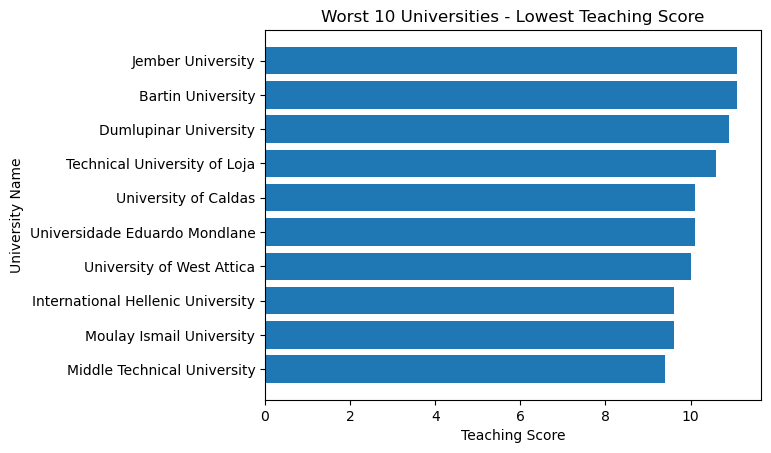

In [32]:
df = pd.read_csv(path,index_col=0)
# Convert the "scores_teaching" column in the DataFrame 'df' to numeric, coercing any errors to NaN
df["scores_teaching"] = pd.to_numeric(df["scores_teaching"], errors="coerce")
# Drop rows with missing values in the "scores_teaching" column
df = df.dropna(subset="scores_teaching")

# Sort the DataFrame 'df' based on the "scores_teaching" column in descending order
# This will arrange the DataFrame with the worst teaching scores at the top
df = df.sort_values(by="scores_teaching", ascending=True)

# Create an empty DataFrame 'result' to store the university names and their teaching scores
result = pd.DataFrame()

# Add two columns to 'result': "Name" containing university names and "Teaching Score" containing their teaching scores
result["Name"] = df["name"]
result["Teaching Score"] = df["scores_teaching"]

# Select the top 10 rows of the 'result' DataFrame, representing the universities with the worst teaching scores
result = result.head(10)
print(result)
# Create a horizontal bar plot using Matplotlib to visualize the worst 10 universities
plt.barh(result['Name'], result['Teaching Score'])

# Set labels for the X and Y axes, and the plot title
plt.xlabel('Teaching Score')
plt.ylabel('University Name')
plt.title('Worst 10 Universities - Lowest Teaching Score')

# Display the bar plot
plt.show()

* **Examine the relationship between features "stats_student_staff_ratio" and "scores_research" using visualization. Interpret the results.**

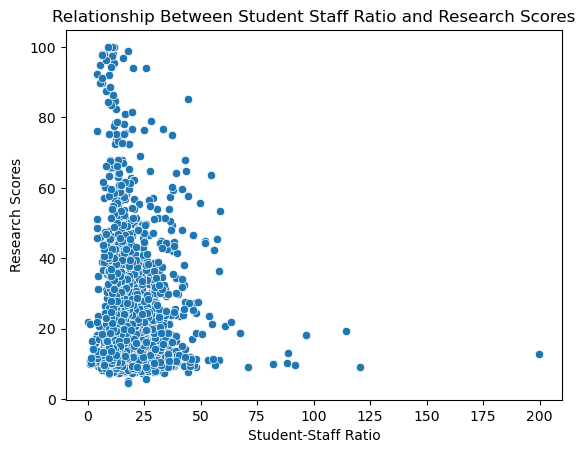

In [33]:
# Create a scatterplot using Seaborn (sns) to visualize the relationship between two variables
# The x-axis represents the 'stats_student_staff_ratio' column, and the y-axis represents the 'scores_research' column
sns.scatterplot(data=df, x=df['stats_student_staff_ratio'], y=df['scores_research'])
# Convert the "stats_student_staff_ratio" and "scores_research" column in the DataFrame 'df' to numeric, coercing any errors to NaN
df["stats_student_staff_ratio"] = pd.to_numeric(df["stats_student_staff_ratio"], errors="coerce")
df["scores_research"] = pd.to_numeric(df["scores_research"], errors="coerce")
# Drop rows with missing values in the "scores_research" and "stats_student_staff_ratio" columns.
df = df.dropna(subset="scores_research")
df = df.dropna(subset="stats_student_staff_ratio")

# Set the title for the plot
plt.title('Relationship Between Student Staff Ratio and Research Scores')

# Label the X and Y axes for clarity
plt.xlabel('Student-Staff Ratio')
plt.ylabel('Research Scores')

# Display the scatterplot
plt.show()

* **Examine the relationship between features "scores_overall_rank" and "scores_teaching" using visualization. Interpret the results.**

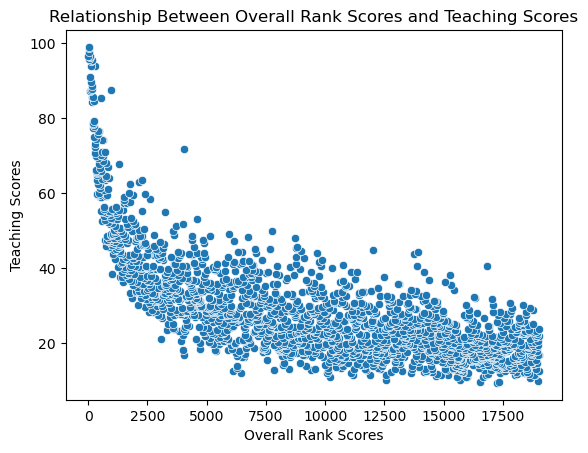

In [34]:



# Convert the "scores_overall_rank" and "scores_teaching" columns in the DataFrame 'df' to numeric, coercing any errors to NaN
df["scores_overall_rank"] = pd.to_numeric(df["scores_overall_rank"], errors="coerce")
df["scores_teaching"] = pd.to_numeric(df["scores_teaching"], errors="coerce")


# Drop rows with missing values in the "scores_overall_rank" and "scores_teaching" column
df = df.dropna(subset="scores_overall_rank")
df = df.dropna(subset="scores_teaching")


#Create a scatterplot using Seaborn (sns) to visualize the relationship between two variables
# The x-axis represents the 'scores_overall_rank' column, and the y-axis represents the 'scores_teaching' column
sns.scatterplot(data=df, x=df['scores_overall_rank'], y=df['scores_teaching'])

# Set the title for the plot
plt.title('Relationship Between Overall Rank Scores and Teaching Scores')

# Label the X and Y axes for clarity
plt.xlabel('Overall Rank Scores')
plt.ylabel('Teaching Scores')

# Display the scatterplot
plt.show()

* **Show the distribution of world university rank across scores_industry_income**

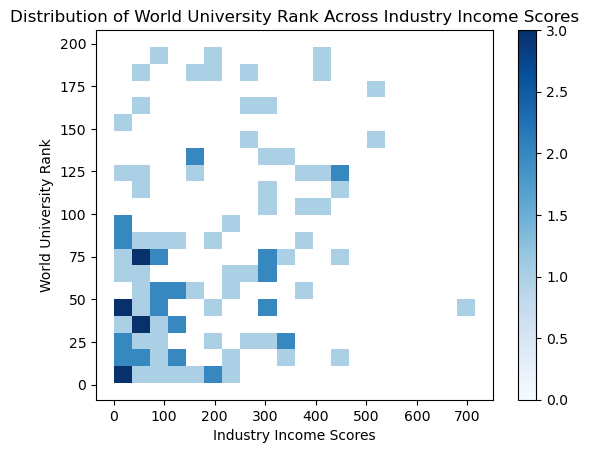

In [35]:
df = pd.read_csv(path,index_col=0)

# Convert non-numeric values in the "rank" column to NaN
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")

# Drop rows with missing values in the "rank" column
df = df.dropna(subset="rank")


# Group the DataFrame 'df' by the "rank" column and select the "scores_industry_income_rank" column
result = df.groupby("rank")["scores_industry_income_rank"]

# Create a 2D histogram plot using Seaborn (sns)
# The x-axis represents the "scores_industry_income_rank," and the y-axis represents the "rank" column
# The number of bins for the histogram is set to 20, and a color map ("cmap") is specified
# A color bar ("cbar") is included to indicate the density of data points
sns.histplot(data=df, x=df["scores_industry_income_rank"], y=df["rank"], bins=20, cmap='Blues', cbar=True)

# Set the title for the plot
plt.title('Distribution of World University Rank Across Industry Income Scores')

# Label the X and Y axes for clarity
plt.xlabel('Industry Income Scores')
plt.ylabel('World University Rank')

# Display the 2D histogram plot
plt.show()

## PART 5: Feature Engineering 10p

* Create a new column called "research_performance" using equal-width binning from scratch with number of bins = 5 using the column "scores_research". Do not use the built-in functions for binning.
* Name the groups as "Poor Average Research", "Below Average Research", "Average Research", "Above Average Research", "High Research Performance".
* Use visualization techniques to show your result.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'High Research Performance'),
  Text(1, 0, 'Above Average Research'),
  Text(2, 0, 'Average Research'),
  Text(3, 0, 'Below Average Research'),
  Text(4, 0, 'Poor Average Research')])

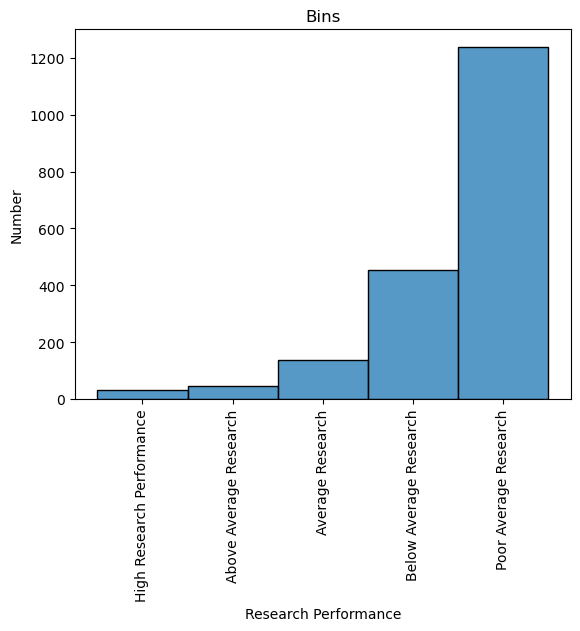

In [37]:
df = pd.read_csv(path, index_col=0)

groups = ["Poor Average Research","Below Average Research","Average Research","Above Average Research","High Research Performance"]
research = []


#Finding and identify the given values,
#and using them in the function.
BinsNum = 5
minforScore = df["scores_research"].min()
width = (df["scores_research"].max()-df["scores_research"].min())/BinsNum

#Assign each data point to thousands.
for i in df['scores_research']:
    #It is used to find which bin range the data belongs to.
    IndexBin = int((i - minforScore) / width)
    #Since "bins" can be negative or large, it is used to limit and correct these values.
    IndexBin = max(0, min(IndexBin, BinsNum - 1))  
    #Adds the data of the given group names according to the bin index.
    research.append(groups[IndexBin])

df['research_performance'] = research

#Visualizing results.
sns.histplot(df, x=df["research_performance"], bins=BinsNum)
plt.title('Bins')
plt.xlabel('Research Performance')
plt.ylabel('Number')
plt.xticks(rotation=90)




## Feedback (Optional)
* Hello, your comments are important for improving assignments, so could you please evaluate the assignment in a few sentences (difficulty level, clarity, relevance etc.)?